<font size="6"><b>EDA</b></font>

<br>
<font size="3"><b>Import libraries</b></font>

In [1]:
# sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, recall_score, confusion_matrix

# nltk
from nltk import FreqDist

# utilities
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# preferences
pd.set_option('display.max_columns', None)
%matplotlib inline

<br>
<font size="3"><b>Read in dataset and display column and datatype info</b></font>
<br>
Dataset preprocessed via data_processing.ipynb

In [2]:
# read tsv dataset into pandas df
filename = 'amazon_reviews_us_Luggage_v1_00'

df = pd.read_csv(f'{filename}_processed.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 35 columns):
marketplace          12132 non-null object
customer_id          12132 non-null int64
review_id            12132 non-null object
product_id           12132 non-null object
product_parent       12132 non-null int64
product_title        12132 non-null object
product_category     12132 non-null object
star_rating          12132 non-null float64
helpful_votes        12132 non-null float64
total_votes          12132 non-null float64
vine                 12132 non-null object
verified_purchase    12132 non-null object
review_headline      12132 non-null object
review_body          12132 non-null object
review_date          12132 non-null object
HELP                 12132 non-null float64
TARGET               12132 non-null int64
TOKEN                12132 non-null object
STOP                 12132 non-null object
LEM                  12132 non-null object
STEM                 12132 non

<br>
<font size="3"><b>Preview dataframe</b></font>

In [4]:
df.head(3)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,HELP,TARGET,TOKEN,STOP,LEM,STEM,CHAR,NUM,WORD,LEN,SENT,AVG,INTERRO,PER,EXCLAM,COUNT,CAPS,MED,FAV,POP
0,US,20761040,R11IBSD5E6HPSD,B002B3FWXY,677901073,Travelon Anti-Theft Classic Messenger Bag,Luggage,1.0,29.0,31.0,N,Y,This bag was on my shoulder and it just fell t...,The strap broke!!! It was supposed to be anti...,2015-08-31,0.935484,0,"['The', 'strap', 'broke', 'It', 'was', 'suppos...","['strap', 'broke', 'supposed', 'anti', 'theft'...","['strap', 'broke', 'supposed', 'anti', 'theft'...","['strap', 'broke', 'suppos', 'anti', 'theft', ...",318,25,63,5.047619,6,10.500000,1,0.166667,2,3,0.031447,4.0,-3.0,15
1,US,23857312,R3NPROA23JJRFF,B00V6FKB5M,909535974,MOIERG Vintage Trolley Luggage 2tone TSA,Luggage,5.0,11.0,15.0,N,Y,This product is absolutely BEAUTIFUL. I ordere...,This product is absolutely BEAUTIFUL. I order...,2015-08-31,0.733333,0,"['This', 'product', 'is', 'absolutely', 'BEAUT...","['product', 'absolutely', 'beautiful', 'ordere...","['product', 'absolutely', 'beautiful', 'ordere...","['product', 'absolut', 'beauti', 'order', 'lar...",437,39,80,5.462500,9,8.888889,1,0.111111,1,2,0.048055,5.0,0.0,1
2,US,12318409,R2KVWAYBPWK1OV,B011KEPZG8,919734058,Iblue Canvas Leather Weekend Shoulder Duffels ...,Luggage,5.0,20.0,22.0,N,N,My boyfriend wouldn't be without this for travel!,This review is for the Iblue Oversized Leather...,2015-08-31,0.909091,0,"['This', 'review', 'is', 'for', 'the', 'Iblue'...","['review', 'iblue', 'oversized', 'leather', 'c...","['review', 'iblue', 'oversized', 'leather', 'c...","['review', 'iblu', 'overs', 'leather', 'canva'...",1951,193,351,5.558405,15,23.400000,1,0.066667,6,9,0.033316,5.0,0.0,1


<br>
<font size="3"><b>EDA</b></font>

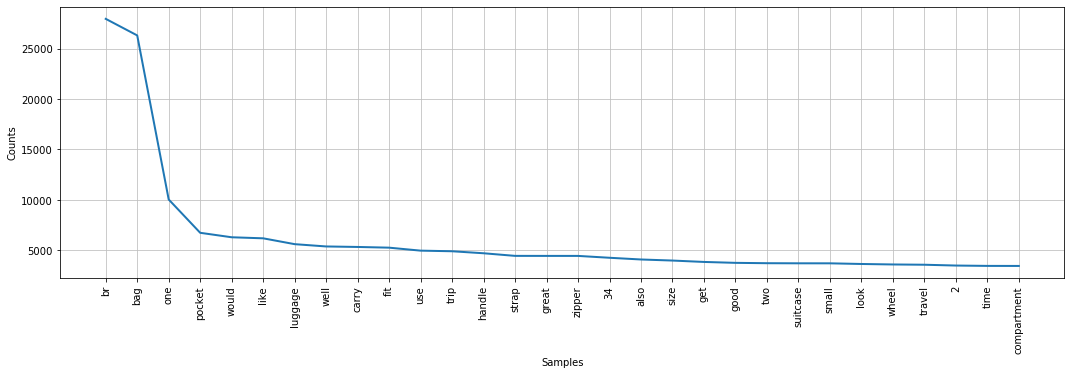

In [5]:
# review vocab
review_vocab = [word for review in df.LEM for word in eval(review)]
review_vocab_freqdist = FreqDist(review_vocab)
plt.figure(figsize=(18,5))
review_vocab_freqdist.plot(30)
plt.show()

#### Most frequent words

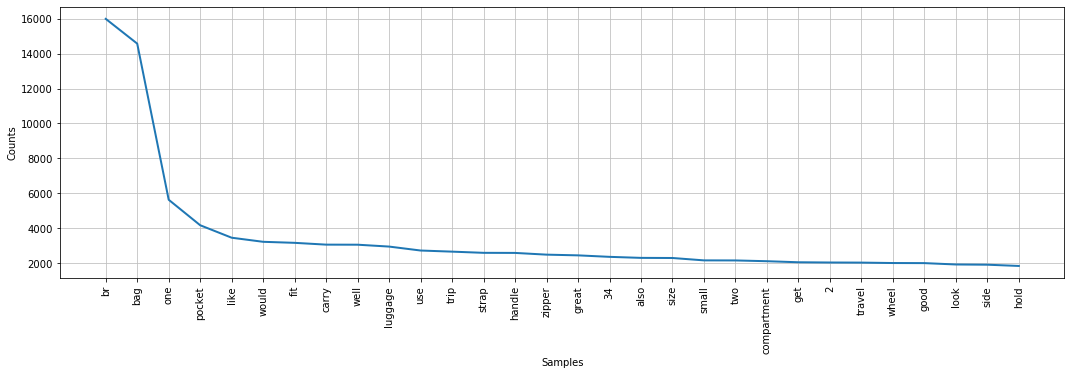

In [6]:
# helpful review vocab
helpful_review_vocab = [word for review in df[df.TARGET==1].LEM for word in eval(review)]
helpful_review_vocab_freqdist = FreqDist(helpful_review_vocab)

plt.figure(figsize=(18,5))
helpful_review_vocab_freqdist.plot(30)
plt.show()

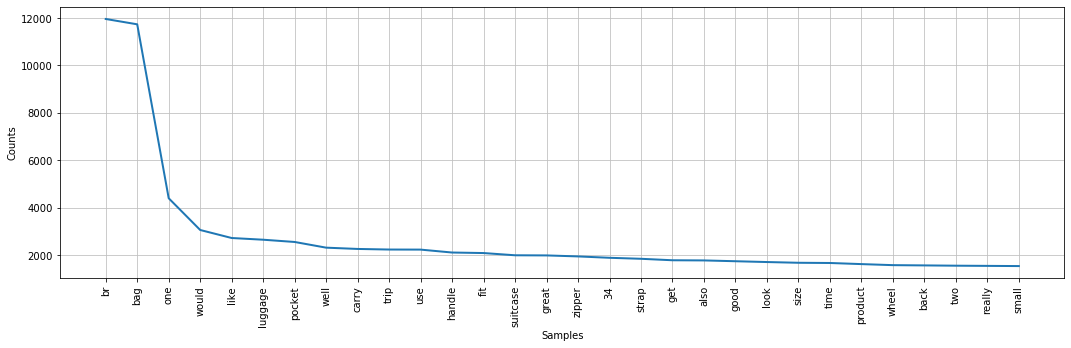

In [7]:
# unhelpful review vocab
unhelpful_review_vocab = [word for review in df[df.TARGET==0].LEM for word in eval(review)]
unhelpful_review_vocab_freqdist = FreqDist(unhelpful_review_vocab)
plt.figure(figsize=(18,5))
unhelpful_review_vocab_freqdist.plot(30)
plt.show()

KeyboardInterrupt: 

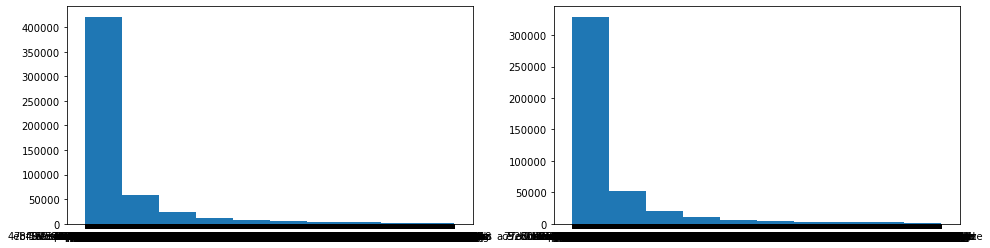

In [8]:
figure = plt.figure(figsize=(16,4))

ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)

ax1.hist(helpful_review_vocab)
ax2.hist(unhelpful_review_vocab)

# ax1.title.set_text('Helpful')
# ax2.title.set_text('Unhelpful')


plt.tight_layout(pad=0)

plt.show()